In [26]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [48]:
df = pd.read_csv("listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,60,3,278,2019-11-21,2.90,1,137
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-03-27,3.73,2,0
2,25428,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,100,14,5,2020-01-02,0.12,1,58
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,138,2,221,2020-07-25,2.17,1,217
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,338,2020-02-06,4.52,2,298


In [29]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.672400e+04,1.672400e+04,0.0,16724.000000,16724.000000,16724.00000,16724.000000,16724.000000,14406.000000,16724.000000,16724.000000
mean,2.097418e+07,6.908414e+07,NaN,52.365452,4.889623,156.15977,4.009208,24.103683,0.609491,1.801124,60.523081
std,1.327522e+07,8.948906e+07,NaN,0.016607,0.036244,172.48717,19.761988,55.379889,1.122151,3.611364,111.861502
min,2.818000e+03,3.159000e+03,NaN,52.278820,4.755710,0.00000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.013306e+07,9.658876e+06,NaN,52.355100,4.863935,95.00000,2.000000,2.000000,0.110000,1.000000,0.000000
50%,1.919342e+07,2.917258e+07,NaN,52.364830,4.887040,129.00000,2.000000,8.000000,0.270000,1.000000,0.000000
75%,3.085450e+07,8.907991e+07,NaN,52.375340,4.909410,180.00000,3.000000,21.000000,0.600000,1.000000,71.000000
max,5.080750e+07,4.102777e+08,NaN,52.428040,5.065527,8000.00000,1100.000000,865.000000,30.000000,50.000000,365.000000


In [49]:
# data cleaning
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.drop(['neighbourhood_group'], inplace=True, axis=1)

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) |(df['price'] > (Q3 + 1.5 * IQR)))]
print(df['price'].describe())

count    15842.000000
mean       135.715629
std         58.986716
min          0.000000
25%         94.250000
50%        125.000000
75%        170.000000
max        307.000000
Name: price, dtype: float64


In [50]:
#splitting the data for apartment vs others
df_apt = df[df['room_type'] == 'Entire home/apt']
df_others = df[df['room_type'] != 'Entire home/apt']

<AxesSubplot:title={'center':'price'}, xlabel='[room_type]'>

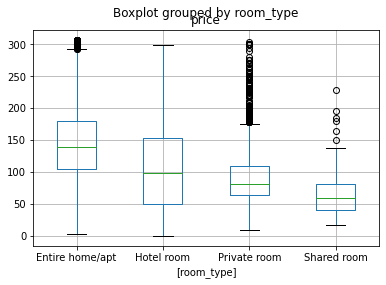

In [51]:
df[['room_type', 'price']].boxplot(by = 'room_type')

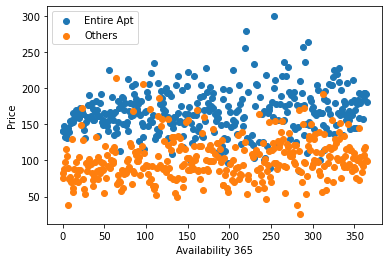

In [59]:
pricings_apt_avail = df_apt.groupby('availability_365')['price'].mean()
pricings_others_avail = df_others.groupby('availability_365')['price'].mean()

plt.scatter(pricings_apt_avail.index, pricings_apt_avail, label = 'Entire Apt')
plt.scatter(pricings_others_avail.index, pricings_others_avail, label = 'Others')
xlabel('Availability 365')
ylabel('Price')
legend (numpoints = 1, loc = 'best')

(0.0, 400.0)

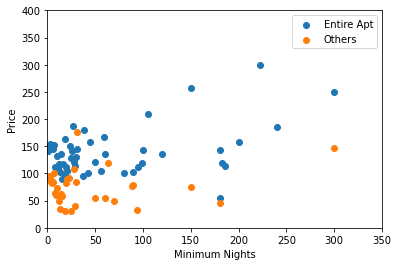

In [72]:
pricings_apt_minnight = df_apt.groupby('minimum_nights')['price'].mean()
pricings_others_minnight = df_others.groupby('minimum_nights')['price'].mean()

plt.scatter(pricings_apt_minnight.index, pricings_apt_minnight, label = 'Entire Apt')
plt.scatter(pricings_others_minnight.index, pricings_others_minnight, label = 'Others')
xlabel('Minimum Nights')
ylabel('Price')
legend (numpoints = 1, loc = 'best')
plt.xlim(0,350)
plt.ylim(0,400)

<AxesSubplot:xlabel='neighbourhood'>

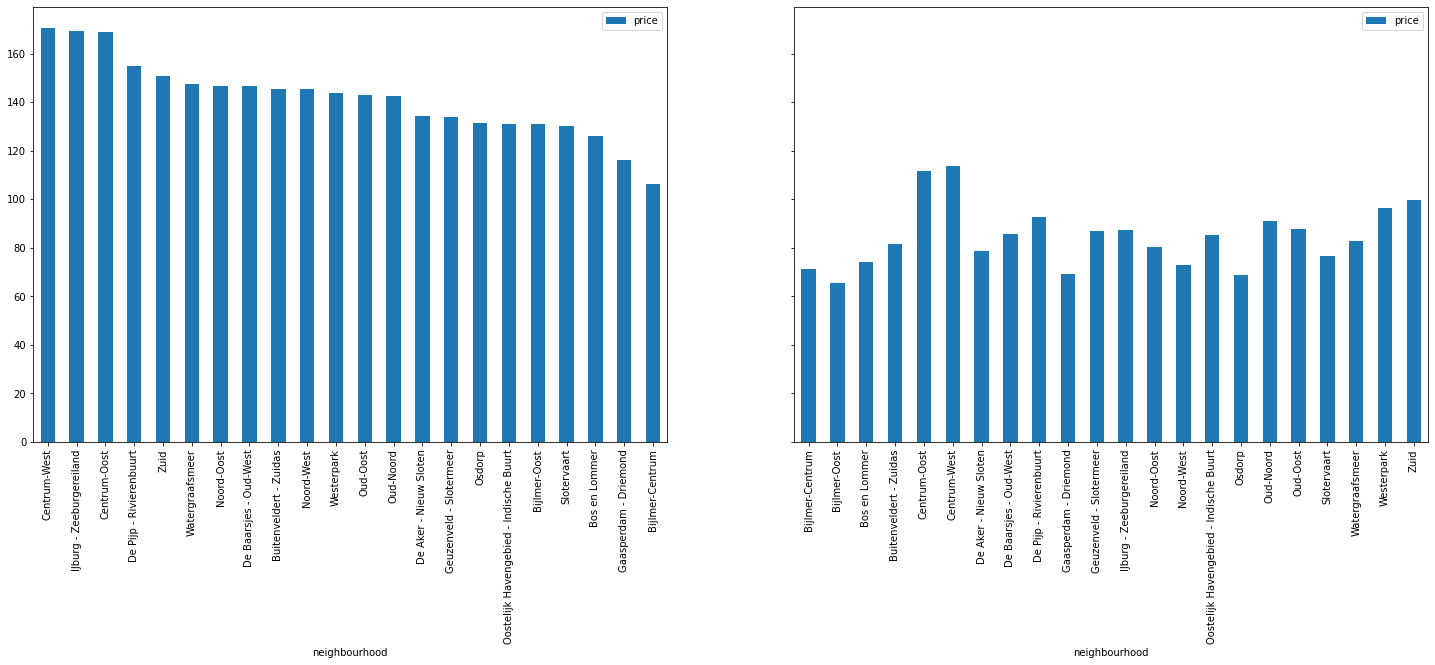

In [130]:
a = df_apt.groupby('neighbourhood')[['price']].mean().sort_values(by = 'price', ascending = False)
b = df_others.groupby('neighbourhood')[['price']].mean()


fig, (ax1, ax2) = subplots(nrows=1,
                                ncols=2,
                                sharex=False,
                                sharey=True,
                                figsize=(25, 8))
a.plot(ax = ax1, kind = 'bar')
b.plot(ax = ax2, kind = 'bar')
#ax2.plot(1,2)

<AxesSubplot:xlabel='neighbourhood'>

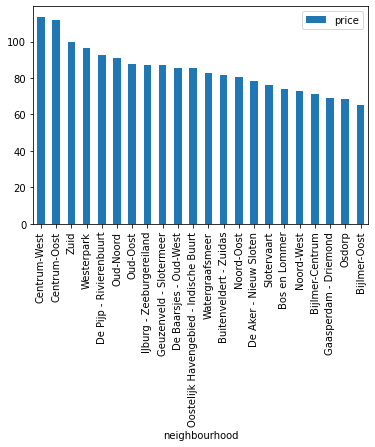

In [125]:
df_others.groupby('neighbourhood')[['price']].mean().sort_values(by = 'price', ascending = False).plot.bar()

<AxesSubplot:>

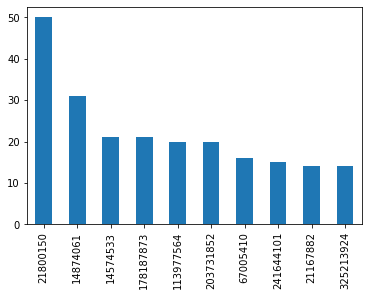

In [21]:
#identifying hosts with max properties
listings['host_id'].value_counts().plot(kind = 'bar')

In [17]:
listings

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,60,3,278,2019-11-21,2.90,1,137
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,Centrum-Oost,52.364070,4.893930,Private room,106,1,339,2020-03-27,3.73,2,0
2,25428,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",56142,Joan,Centrum-West,52.374900,4.884870,Entire home/apt,100,14,5,2020-01-02,0.12,1,58
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.387610,4.891880,Private room,138,2,221,2020-07-25,2.17,1,217
4,28871,Comfortable double room,124245,Edwin,Centrum-West,52.367750,4.890920,Private room,75,2,338,2020-02-06,4.52,2,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16719,50770088,Van Westhouse 3 City centre Canal house studio,19228755,Thedie,Centrum-Oost,52.372536,4.902582,Private room,99,5,0,NaN,0.00,3,256
16720,50770121,Sfeervol en warm appartement * A’dam Oud-West *,250631796,Danny,De Baarsjes - Oud-West,52.372001,4.872452,Entire home/apt,61,3,0,NaN,0.00,1,191
16721,50800575,leuke plek voor 2 in de pijp,41488364,Bart,De Pijp - Rivierenbuurt,52.351809,4.906918,Entire home/apt,80,1,0,NaN,0.00,1,356
16722,50806119,Spacious and Light apartment in West of Amster...,14289831,Hein,Bos en Lommer,52.379064,4.858107,Entire home/apt,125,7,0,NaN,0.00,1,26


In [16]:
#splitting listings data across room type - Entire Apartment vs. others 
listings_appt = listings[listings['room_type'] == 'Entire home/apt']
listings_appt

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,25428,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",56142,Joan,Centrum-West,52.374900,4.884870,Entire home/apt,100,14,5,2020-01-02,0.12,1,58
6,41125,Amsterdam Center Entire Apartment,178515,Fatih,Centrum-West,52.379200,4.884320,Entire home/apt,160,4,89,2020-02-10,0.76,1,0
7,43109,Oasis in the middle of Amsterdam,188098,Aukje,Centrum-West,52.373660,4.888080,Entire home/apt,211,3,59,2019-04-16,0.56,1,365
8,43980,View into park / museum district (long/short s...,65041,Ym,Zuid,52.357350,4.861580,Entire home/apt,67,7,61,2015-04-23,0.53,2,0
9,46386,Cozy loft in central Amsterdam,207342,Joost,De Pijp - Rivierenbuurt,52.351980,4.907460,Entire home/apt,150,3,3,2018-01-03,0.03,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16717,50767325,lovely studio near center of Amsterdam,410277680,Davoud,Noord-Oost,52.399251,4.938890,Entire home/apt,90,1,0,NaN,0.00,1,187
16720,50770121,Sfeervol en warm appartement * A’dam Oud-West *,250631796,Danny,De Baarsjes - Oud-West,52.372001,4.872452,Entire home/apt,61,3,0,NaN,0.00,1,191
16721,50800575,leuke plek voor 2 in de pijp,41488364,Bart,De Pijp - Rivierenbuurt,52.351809,4.906918,Entire home/apt,80,1,0,NaN,0.00,1,356
16722,50806119,Spacious and Light apartment in West of Amster...,14289831,Hein,Bos en Lommer,52.379064,4.858107,Entire home/apt,125,7,0,NaN,0.00,1,26


In [18]:
listings_remaining = listings[~listings.room_type.isin(listings_appt.room_type)]
listings_remaining

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,60,3,278,2019-11-21,2.90,1,137
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,Centrum-Oost,52.364070,4.893930,Private room,106,1,339,2020-03-27,3.73,2,0
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.387610,4.891880,Private room,138,2,221,2020-07-25,2.17,1,217
4,28871,Comfortable double room,124245,Edwin,Centrum-West,52.367750,4.890920,Private room,75,2,338,2020-02-06,4.52,2,298
5,29051,Comfortable single room,124245,Edwin,Centrum-Oost,52.365840,4.891110,Private room,55,2,480,2020-02-26,5.44,2,318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,50742990,The Standard | Boardwalk suite with private deck,408898089,Arthur,Geuzenveld - Slotermeer,52.382240,4.782650,Private room,140,1,0,NaN,0.00,6,359
16712,50743857,The Barn | Private Field cabin with wood stove,408898089,Arthur,Geuzenveld - Slotermeer,52.382340,4.782630,Private room,304,1,0,NaN,0.00,6,350
16715,50762636,Double/Triple with private bathroom in a homestay,311743899,Hilletje,Bos en Lommer,52.382099,4.856841,Private room,76,2,0,NaN,0.00,1,336
16718,50770030,Spacious room with balcony in lively neighbour...,29687232,Niels,De Baarsjes - Oud-West,52.364852,4.863416,Private room,55,1,0,NaN,0.00,1,76


<AxesSubplot:xlabel='neighbourhood'>

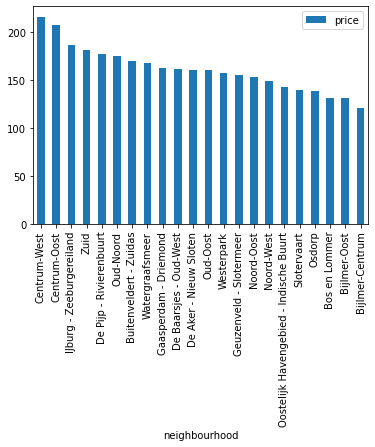

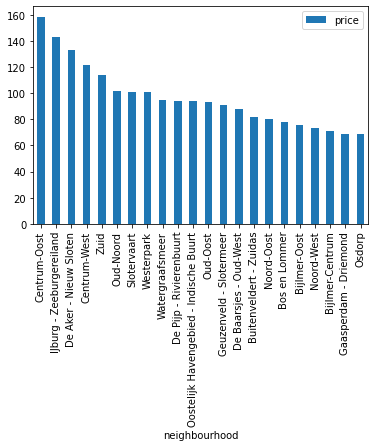

In [27]:
listings_appt.groupby('neighbourhood')[['price']].mean().sort_values(by = 'price', ascending = False).plot.bar()
listings_remaining.groupby('neighbourhood')[['price']].mean().sort_values(by = 'price', ascending = False).plot.bar()

#listings_appt[['neighbourhood', 'price']].boxplot(by = 'neighbourhood', showfliers=False)

In [22]:
#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in listings.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [25]:
listings.groupby(['host_id', 'host_name','neighbourhood','room_type'])[['id']].count().sort_values(by = 'id', ascending = False)[:10]

,,,,id
host_id,host_name,neighbourhood,room_type,
14574533,Hotel Not Hotel,De Baarsjes - Oud-West,Private room,21
67005410,Feliciano,Centrum-West,Private room,16
178187873,Marcel And Pauline,Centrum-Oost,Entire home/apt,15
241644101,Wittenberg,Centrum-Oost,Entire home/apt,15
10076897,Geraldine,Zuid,Private room,13
325213924,Dario,Centrum-West,Private room,12
245267147,ClinkNOORD,Oud-Noord,Hotel room,12
5796250,Remco,Centrum-West,Entire home/apt,11
383148214,Bells Boutique Hotel,De Pijp - Rivierenbuurt,Private room,10
